# BINARY CLASSIFICATION OF IMAGE IN TENSORFLOW


#### The dataset comprises of two image folder: happy and sad. Happy contains pictures of happy people, Sad contains pictures of sad people. The dataset is  collected from the kaggle

## Import the neccessary libraries

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


## Load the dataset

In [2]:
# loading and processing of happy dataset using ImageDataGenerator function

train_dataset = ImageDataGenerator( rescale=1./255)
test_dataset = ImageDataGenerator( rescale=1./255)

train_data = train_dataset.flow_from_directory(
    'data/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
test_data = test_dataset.flow_from_directory(
    'data/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 427 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## Plotting happy images

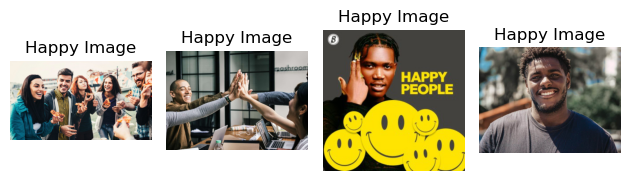

In [4]:
 from matplotlib.image import imread
# Replace 'data/train' with the actual path to your train folder containing subfolders.
train_folder = 'data/train/happy'

# List all image files in the 'normal' subfolder
happy_images = [os.path.join(train_folder, filename) for filename in os.listdir(train_folder) if filename.endswith('.jpeg')]

# Define the number of images you want to display
hap_images_to_display = 4

# Plot the selected number of images
for i in range(hap_images_to_display):
    # Load and display the image
    img = imread(happy_images[i])
    plt.subplot(1, hap_images_to_display, i + 1)
    plt.imshow(img)
    plt.title('Happy Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Ploting sad images

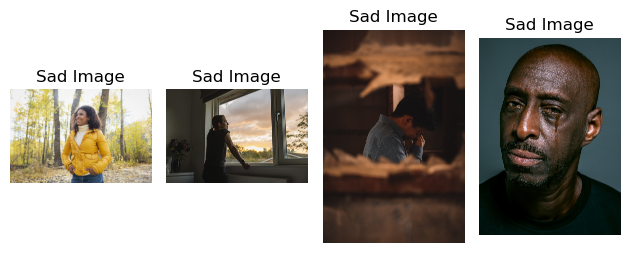

In [5]:

# Replace 'data/train' with the actual path to your train folder containing subfolders.
train_folder = 'data/train/sad'

# List all image files in the 'normal' subfolder
sad_images = [os.path.join(train_folder, filename) for filename in os.listdir(train_folder) if filename.endswith('.jpeg')]

# Define the number of images you want to display
sa_images_to_display = 4

# Plot the selected number of images
for i in range(sa_images_to_display):
    # Load and display the image
    img = imread(sad_images[i])
    plt.subplot(1, sa_images_to_display, i + 1)
    plt.imshow(img)
    plt.title('Sad Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Building a model

In [6]:
model =Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Train a model

In [8]:
model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
14/14 [==============================] - 20s 1s/step - loss: 0.3497 - accuracy: 0.8407 - val_loss: 0.6652 - val_accuracy: 0.6000
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.2961 - accuracy: 0.8665 - val_loss: 0.5813 - val_accuracy: 0.6500
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.2586 - accuracy: 0.8970 - val_loss: 0.6924 - val_accuracy: 0.6500
Epoch 4/10
14/14 [==============================] - 20s 1s/step - loss: 0.1853 - accuracy: 0.9321 - val_loss: 0.5638 - val_accuracy: 0.7500
Epoch 5/10
14/14 [==============================] - 21s 1s/step - loss: 0.1493 - accuracy: 0.9461 - val_loss: 0.7405 - val_accuracy: 0.7000
Epoch 6/10
14/14 [==============================] - 21s 1s/step - loss: 0.0846 - accuracy: 0.9813 - val_loss: 0.9260 - val_accuracy: 0.6500
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.0577 - accuracy: 0.9859 - val_loss: 1.0233 - val_accuracy: 0.7000
Epoch 8/10
14/14 [==

## Evaluate the model

In [9]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 0s 278ms/step - loss: 0.5956 - accuracy: 0.8000
Test Loss: 0.5955511331558228
Test Accuracy: 0.800000011920929


## Save the Model

In [12]:
model.save('image_classification_model.h5')
model.save('image_classification_model')

C:\Users\EVERISTUS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: image_classification_model\assets


INFO:tensorflow:Assets written to: image_classification_model\assets
